In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [77]:
def show_image(window_name, image, cmap=None):
    """Exibe imagem inline no notebook usando matplotlib."""
    if image is None:
        print(f"{window_name}: imagem nao carregada (None)")
        return
    # Se imagem colorida em BGR, converte para RGB para exibição correta
    if len(image.shape) == 3 and image.shape[2] == 3:
        img_disp = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        img_disp = image
        if cmap is None:
            cmap = 'gray'
    plt.figure(figsize=(8, 6))
    plt.title(window_name)
    plt.axis('off')
    plt.imshow(img_disp, cmap=cmap)
    plt.show()

def close_all_windows():
    pass

Corrupt JPEG data: 2 extraneous bytes before marker 0xd7


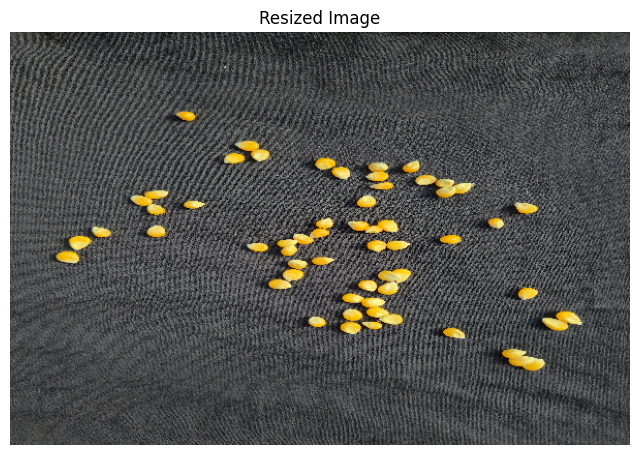

In [78]:
img = cv2.imread('imagens/20251115_152402.jpg')
img = cv2.resize(img, (600, 400))
show_image("Resized Image", img)

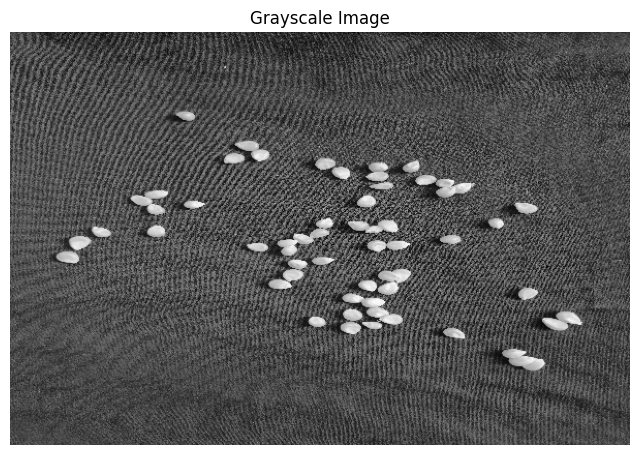

In [79]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_image("Grayscale Image", gray)

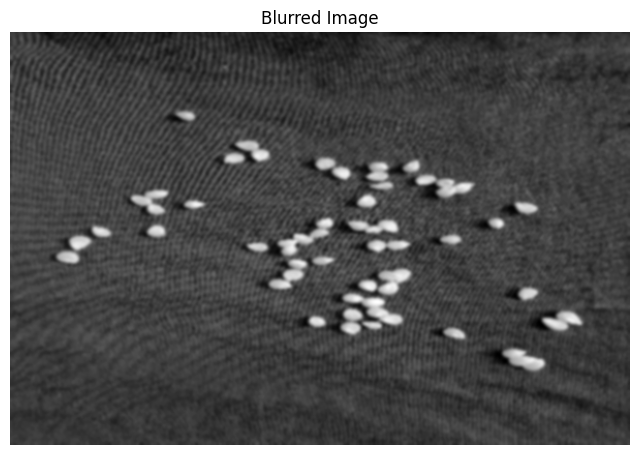

In [80]:
blur = cv2.GaussianBlur(gray, (7, 7), 0)
show_image("Blurred Image", blur)

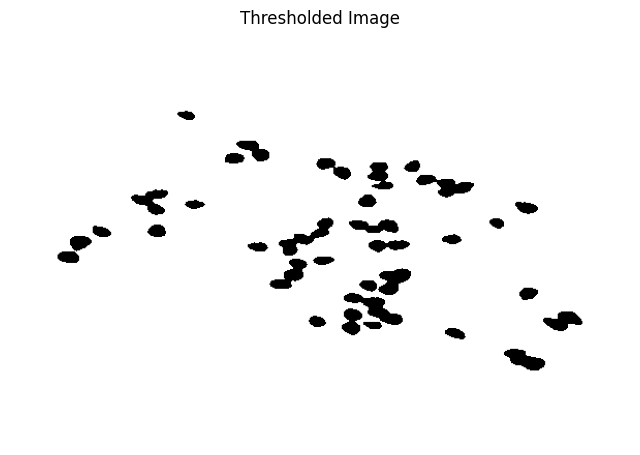

In [81]:
_, thresh = cv2.threshold(
        blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )
show_image("Thresholded Image", thresh)

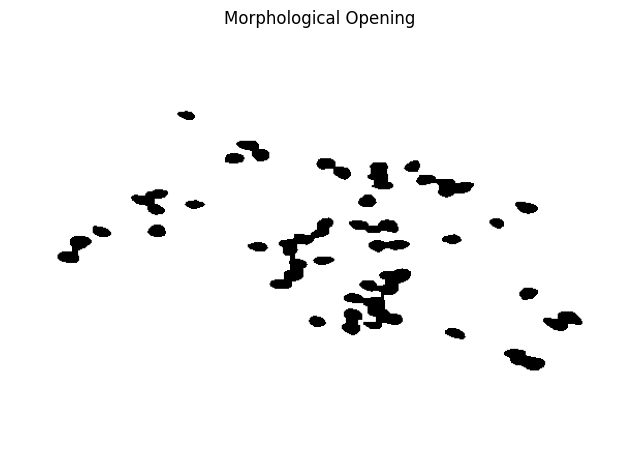

In [82]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
show_image("Morphological Opening", opening)

In [88]:
close_all_windows()